In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [24]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [25]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'gender',
       'Race', 'Education'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

En el presente proyecto es de carácter exploratorio y analizará el dataset de los salarios de profesionales en Data Science el cual contiene más 62.000 registros salariales de las principales empresas a nivel mundial.

En los últimos años se ha desarrollado un creciente interés por las carreras que cubren la necesidad de la sociedad de comprender y analizar grandes cantidades de datos que se generan. Por ello, presentamos en este EDA los resultados de una investigación, de carácter exploratorio, basada en la aplicación de un formulario, vía Internet, a profesionales de Data Science de diferentes empresas, con el objetivo de conocer qué variables influyen en el salario que perciben los profesionales de Data Science.

#### Preguntas de exploración

1. Valores que influyen en los salarios de los profesionales
* ¿Cuánto es el salario anual promedio de acuerdo al género?
* ¿Cuánto es el salario anual promedio de acuerdo al nivel de educación?
* ¿Cuánto es el salario anual promedio de acuerdo a la empresa donde se labora?

2. Valores que influyen en el porcentaje de participación de estos profesionales
* ¿Qué % de estos profesionales son de la raza?
* ¿Qué % de las personas que laboran en este rubro cuentan con educación profesional?
* ¿Qué % de estos profesionales cuentan con bachillerato?

#### 1. Valores que ingluyen en los salarios

In [26]:
#Según el género
df_gender = df.groupby('gender').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_gender

,totalyearlycompensation,basesalary
gender,,
Female,177846.363345,131656.341113
Male,181598.575183,131190.914296
No especificado,191181.685414,137063.684421
Other,187568.807339,135576.436548


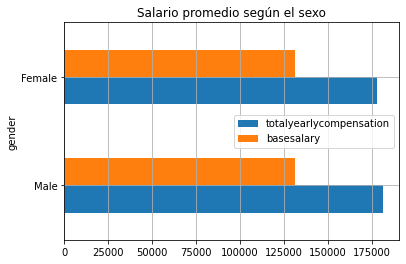

In [27]:
df_gender.loc[['Male','Female']].plot.barh(title = 'Salario promedio según el sexo').grid()

Se observa, gracias al gráfico, cómo en este rubro no existe un sesgo que afecte los promedios del salario base ni la suma anual de los profesionales masculinos y femeninos

In [28]:
#Según el nivel de educación
df_education = df.groupby('Education').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_education

,totalyearlycompensation,basesalary
Education,,
Bachelor's Degree,160026.257191,119645.759881
Highschool,162334.586466,119766.917293
Master's Degree,189512.099260,136922.216961
No especificado,189396.681664,135664.564739
PhD,229413.765823,156674.841772
Some College,174010.676157,129825.622776


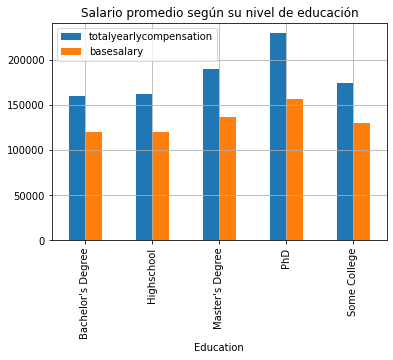

In [29]:
df_education.iloc[[0,1,2,4,5]].plot.bar(title = 'Salario promedio según su nivel de educación').grid()

In [30]:
#Según la empresa
df_empresa = df.groupby('company').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
top_empresas = df_empresa.sort_values(by=['totalyearlycompensation'],ascending = False).head(15)

In [31]:
top_empresas

,totalyearlycompensation,basesalary
company,,
AURORA,298583.333333,187333.333333
CHIME,293823.529412,179470.588235
CLOUDKITCHENS,292500.000000,170000.000000
NETFLIX,290851.851852,170416.569465
WAYMO,290155.555556,175370.828473
UIPATH,283733.333333,158866.666667
UPWORK,281000.000000,176500.000000
AIRBNB,278248.226950,164644.488035
DROPBOX,274523.560209,168666.997386


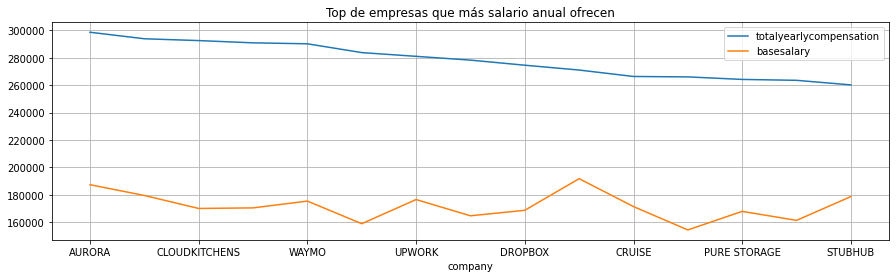

In [32]:
#Top de empresas que más pagan en este rubro
top_empresas.plot.line(figsize = (15, 4), title = 'Top de empresas que más salario anual ofrecen').grid()

Visualizamos que las empresas más conocidas no lideran la cabeza en cuanto a oferta salarial se refiere

#### 2. Valores que influyen en el porcentaje de participación de estos profesionales

In [33]:
#Por raza
x_raza = df['Race'].value_counts()
x_raza

No especificado    33447
Asian               9975
White               6701
Hispanic             982
Two Or More          691
Black                618
Name: Race, dtype: int64

<AxesSubplot:ylabel='Race'>

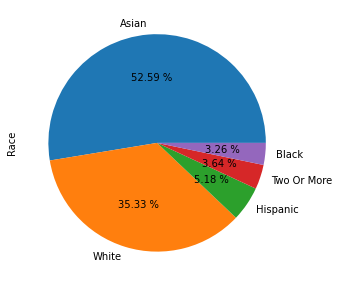

In [34]:
x_raza.iloc[1:6].plot.pie(autopct="%0.2f %%", figsize = (10,5))

El grafico muestra el porcentaje de participacion de los profesionales en Data Science segun su raza, observamos que las personas de raza asiatica tienen una mayor participacion como profesionales de Data Science con 52.59% seguido de la raza blanca con 35.33% y las demas raza con porcentajes de participacion pequeños. Suponiendo que no existe sesgo racial al momento de contratar, estos datos signican que las personas de las razas asiatica y blanca son las que tienen mas interes en estudiar Data Science.

In [35]:
#Por género
df_part_gender = df['gender'].value_counts().reset_index().rename(columns={'index':'Genero','gender':'Cantidad'}).drop(1)
df_part_gender

,Genero,Cantidad
0,Male,29754
2,Female,6242
3,Other,327


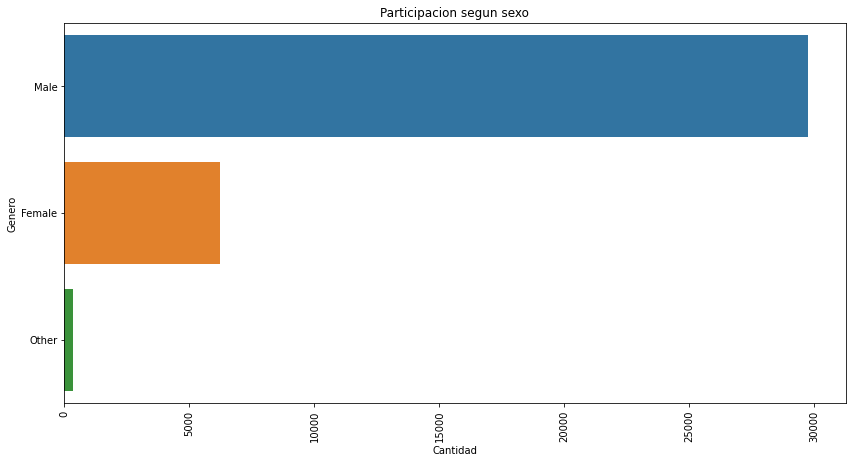

In [36]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun sexo")
sns.barplot(x='Cantidad',y='Genero', data=df_part_gender)
plt.show()

El grafico muestra la cantidad de participacion de los profesionales en Data Science segun su genero, observamos que los hombres tienen una mayor participacion como profesionales de Data Science con 29754 profesionales. Suponiendo que no existe sesgo de genero al momento de contratar, estos datos signican que los hombres tienen mas interes en estudiar Data Science.

In [37]:
#Por educación
part_educacion = df["Education"].value_counts().reset_index().rename(columns={'index':'Título','Education':'Cantidad'}).drop(0)
part_educacion

,Título,Cantidad
1,Master's Degree,12976
2,Bachelor's Degree,10778
3,PhD,1264
4,Some College,281
5,Highschool,266


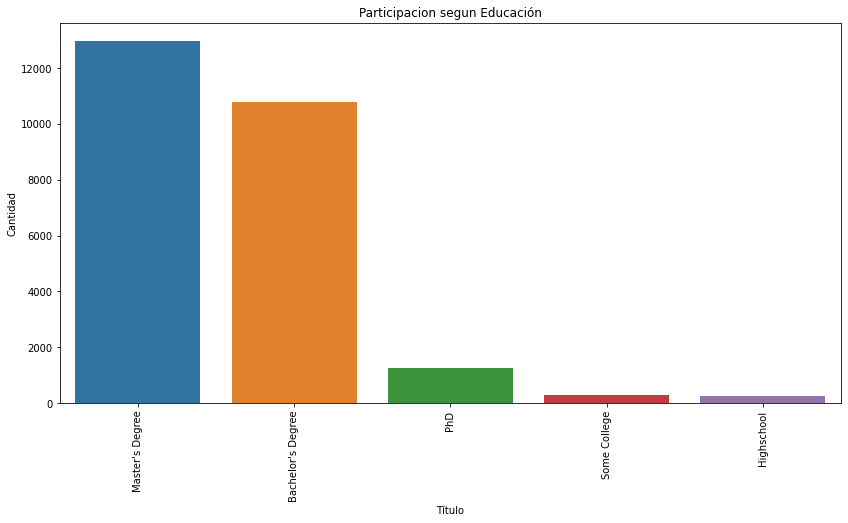

In [38]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun Educación")
sns.barplot(x='Título',y='Cantidad',data=part_educacion)
plt.show()

El grafico muestra la escala de participacion de los profesionales en Data Science segun su nivel de educación, observamos que las personas con título de maestria tienen una mayor participacion como profesionales de Data Science con 12976 profesionales seguido de personas con el titulo de bachiller y los demas titulos con cantidades de participacion pequeños. Esto significa que el titulo profesional es determinante a la hora de contratar a una persona en el area de Data Science.

Y relacionando al gráfico que obtuvimos en la primera parte del análisis (Salario promedio por nivel de educación) deducimos que por la poca cantidad de profesionales que hay con este nivel de educación (PhD) las empresas les otorgan un salario más elevado a comparación profesionales con menor nivel y que son más abundantes en el mercado laboral.

In [39]:
#Gráficos de dispersión

#Primero declara una variable var que contenga los años de experiencia
var = 'yearsatcompany'

In [40]:
data = pd.concat([df['totalyearlycompensation'],df[var]], axis=1)
data.head()

,totalyearlycompensation,yearsatcompany
0,127000,1.5
1,100000,3.0
2,310000,0.0
3,157000,3.0
4,208000,8.5


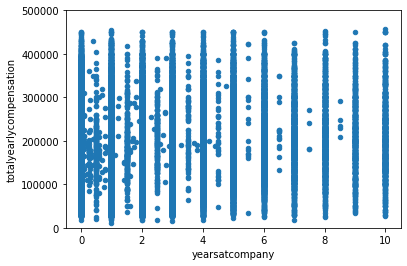

In [41]:
data.plot.scatter(x=var, y='totalyearlycompensation', ylim=(0,500000));

El presente grafico de dispersión muestra que hay una relación entre las variables salario anual y años en la empresa, observamos que no necesariamente el que un profesional en Data Science tenga más años en la empresa en la que labora signifique va a ganar más que otros que tienen menos años en la empresa. En conclusión, el salario anual que ganan los profesionales en Data Science es indiferente a los años en laborando en la empresa.

Correlación

Primero armamos una matriz de correlación para ver cuales son las variables más correlacionadas

In [42]:
corrmat = df.corr()
corrmat

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.356945,0.126118,0.860798,0.781634,0.503491
yearsofexperience,0.356945,1.000000,0.455420,0.375725,0.205055,0.184795
yearsatcompany,0.126118,0.455420,1.000000,0.141784,0.056244,0.034855
basesalary,0.860798,0.375725,0.141784,1.000000,0.507576,0.437706
stockgrantvalue,0.781634,0.205055,0.056244,0.507576,1.000000,0.267721
bonus,0.503491,0.184795,0.034855,0.437706,0.267721,1.000000


<AxesSubplot:>

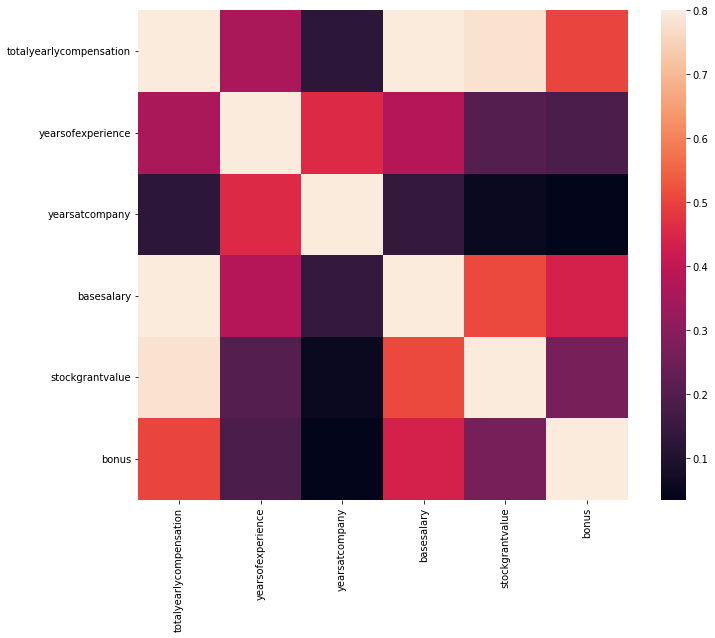

In [43]:
#Luego usamos f,ax para declarar un plt.subplots
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)

Se muestra la correlación entre las variables numéricas y observamos que el salario anual está muy correlacionado con el salario base y valor de concesión de acciones por lo que el salario anual dependerá del salario base y el valor de concesión de acciones. En otras palabras, la cantidad de dinero que un profesional en Data Science gane va a depender del salario base que la empresa le ofrezca y el valor de concesión de acciones que la empresa le ha concedido al profesional en Data Science.

Test de Hipótesis Estadísticas

Test de Normalidad Shapiro-Wilk

Permite determinar que tan probable que los datos sigan una distribución Normal (Gaussiana). El único supuesto necesario para aplicar este test es que las observaciones de la muestra de datos sean independientes e identicamente distribuidas (iid).

Planteamiento de Hipotesis

H0: La muestra tiene una distribucion Normal. Se rechaza si p < 0.05 H1: La muestra NO tiene una distribucion Normal. Se rechaza si p > 0.05

In [46]:
salario_anual= df['totalyearlycompensation'].dropna()
salario_anual.shape

(52414,)

In [47]:
# N > 5000 el valor de p no es preciso, por ello seleccionemos 45000 observaciones aleatoriamente
salario_anual= salario_anual.sample(4500) 

In [48]:
stat, p = shapiro(salario_anual)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=0.982, p=0.000


In [49]:
if p > 0.05:
	print('Se acepta la H0. El salario anual tiene una distribucion Normal.')
else:
	print('Se rechaza la H0. El salario anual NO tiene una distribucion Normal')

Se rechaza la H0. El salario anual NO tiene una distribucion Normal


e:\Bootcamp\Semana 7\PythonAnalytics\ent_v\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Density'>

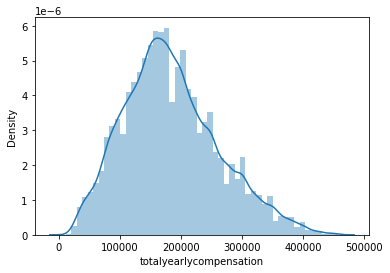

In [50]:
sns.distplot(df['totalyearlycompensation'])

In [51]:
df['totalyearlycompensation'].mean()

184130.9670317091

Se concluye entonces que el salario anual de todos los profesionales en Data Science no siguen una distribución normal. Por lo tanto, el salario anual de la mayoría de los profesionales en Data Science no estará cerca del salario anual medio de 184130.97 dólares. Un número similar de profesionales en Data Science no ganaran un poco más y un poco menos que 184130.97 dólares. Muchos profesionales ganaran mucho más o mucho menos.

Chi-Squared Test

Este test te permite determinar si es probable que dos variables categóricas están relacionadas o son independientes entre sí. Para que este test sea válido se necesita cumplir con 2 supuestos. 1) Las observaciones utilizadas para calcular la tabla de contingencia son independientes 2) Cada valor en la tabla de contingencia debe ser mayor a 25.

Prueba de Hipotesis

H0: Las dos muestras son independientes. Se rechaza si p < 0.05 H1: Existe dependencia entre las muestras. Se rechaza si p > 0.05

In [53]:
contingency_table = pd.crosstab(df['gender'], df['Education'])
contingency_table

Education,Bachelor's Degree,Highschool,Master's Degree,No especificado,PhD,Some College
gender,,,,,,
Female,1967,10,2192,1872,167,34
Male,8129,239,9389,10858,900,239
No especificado,623,9,1330,13931,191,7
Other,59,8,65,188,6,1


In [54]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=11957.536, p=0.000


In [55]:
if p > 0.05:
	print('Se acepta la H0. El genero y la educacion son independientes.')
else:
	print('Se rechaza la H0. Existe dependencia entre el genero y la educacion.')

Se rechaza la H0. Existe dependencia entre el genero y la educacion.
